In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
movie = pd.read_csv(r'data_movie.csv')
movie

,Parasite,132 min,"Drama, Thriller",Won 4 Oscars. 306 wins & 264 nominations total,"$53,369,749"
0,Green Book,130 min,"Biography, Comedy, Drama",Won 3 Oscars. 58 wins & 123 nominations total,"$85,080,171"
1,The Shape of Water,123 min,"Drama, Fantasy, Romance",Won 4 Oscars. 136 wins & 350 nominations total,"$63,859,435"
2,Moonlight,111 min,Drama,Won 3 Oscars. 231 wins & 300 nominations total,"$27,854,932"
3,Spotlight,129 min,"Biography, Crime, Drama",Won 2 Oscars. 124 wins & 144 nominations total,"$45,055,776"
4,Birdman or (The Unexpected Virtue of Ignorance),119 min,"Comedy, Drama",Won 4 Oscars. 193 wins & 293 nominations total,"$42,340,598"
5,12 Years a Slave,134 min,"Biography, Drama, History",Won 3 Oscars. 242 wins & 337 nominations total,"$56,671,993"
6,Argo,120 min,"Biography, Drama, Thriller",Won 3 Oscars. 95 wins & 156 nominations total,"$136,025,503"
7,The Artist,100 min,"Comedy, Drama, Romance",Won 5 Oscars. 162 wins & 204 nominations total,"$44,671,682"
8,The King's Speech,118 min,"Biography, Drama, History",Won 4 Oscars. 108 wins & 206 nominations total,"$138,797,449"


### Answer the following questions in your notebook file:
#### 1.(Graph) What was the runtime for each movie?

KeyError: 'Movie Title'

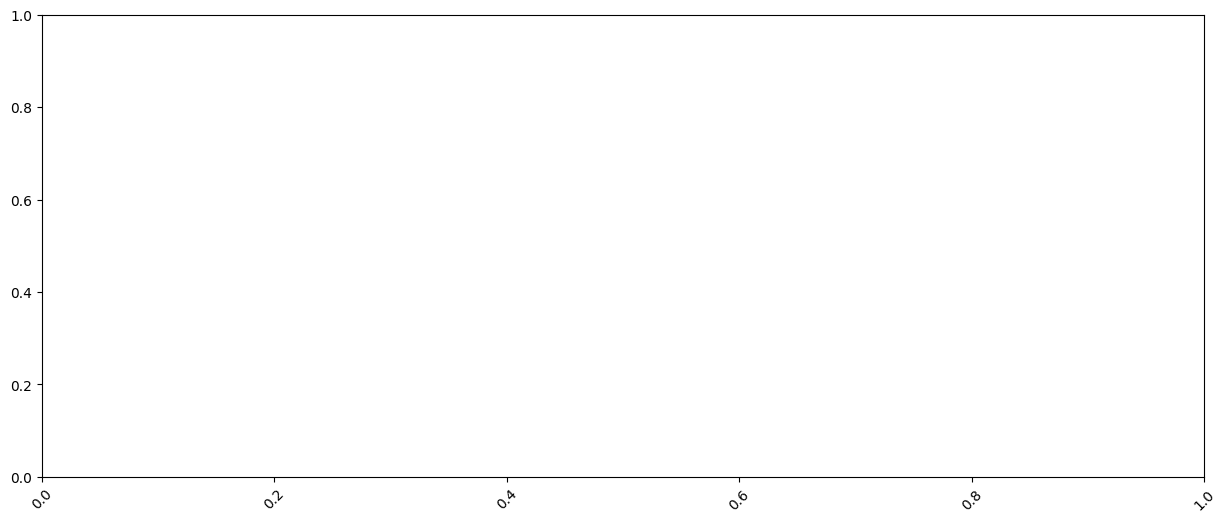

In [5]:
plt.figure(figsize=[15,6])
plt.xticks(rotation=45)
plt.bar(movie['Movie Title'], movie['Runtime'], width=0.8)

plt.title('Movie Runtimes', fontsize=25)
plt.xlabel('Movie Title', fontsize=20)
plt.ylabel('Runtime(Minutes)', fontsize=20)

plt.show()

#### 2. What movie had the longest runtime?
- Answer: the movie with the longest runtime is 'Drive My Car'.


#### 3. Is there any relationship between the length of the movie (runtime) and the number of awards a movie won?
- Answer: as you can see the scatter plot below, There are no relationship between runtime and the number of awards a movie won

In [ ]:
plt.figure(figsize=[15,7])
plt.scatter(movie['Runtime'], movie['Award Wins'])
plt.title('The relationship between Runtime and Award Wins')
plt.xlabel('Movie Runtime')
plt.ylabel('Award Wins')
plt.show()

#### 4. (Graph) How many awards and nominations did each movie receive?

In [ ]:
plt.figure(figsize=[15,7])
plt.xticks(rotation=75)

X_axis = np.arange(len(movie['Movie Title']))
plt.bar(X_axis + 0.3, movie['Award Wins'],0.5,label="Award Wins")
plt.bar(X_axis - 0.3, movies['Award Nominations'],0.5,label="Award Nominations")
plt.xticks(X_axis, movie['Movie Title'])
plt.legend()
plt.ylabel('Total Award', fontsize=16)
plt.xlabel('Movie Title', fontsize=16)
plt.title('Number of Award Wins and Award Nominations Each Movie Won', fontsize=20)